<a href="https://colab.research.google.com/github/LuthKelana/Polygon-Stress/blob/main/Polygon_Stress_Luthfie_Kelana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perhitungan dan Visualisasi 1D Overbuden Stress dan Pore Pressure**

Input

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rho_batuan = 5.9  # g/cc
rho_fluida = 1  # g/cc
g = 9.8  # m/s^2
dz = np.arange(0, 5000, 1000)  # meter

Perhitungan

In [ ]:
Sv = (rho_batuan * g * dz * 1000) / (10**6)  # MPa
Pp = (rho_fluida * g * dz * 1000) / (10**6)  # MPa


Visualisasi

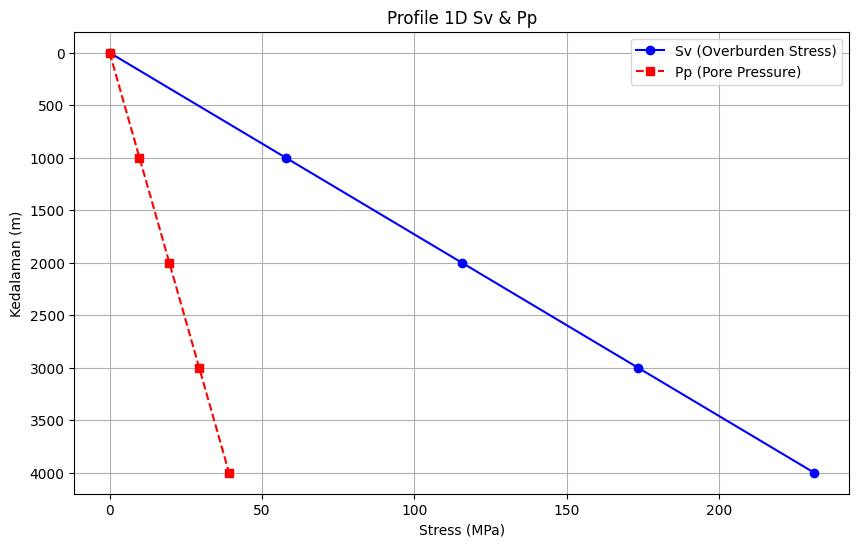

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Sv, dz, label='Sv (Overburden Stress)', marker='o', color='b', linestyle='-')
plt.plot(Pp, dz, label='Pp (Pore Pressure)', marker='s', color='r', linestyle='dashed')


plt.title('Profile 1D Sv & Pp')
plt.xlabel('Stress (MPa)')
plt.ylabel('Kedalaman (m)')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# **Stress Polygon**

Input

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rho_batuan = 5.9  # g/cc
rho_fluida = 1  # g/cc
g = 9.8  # m/s^2
depth = 1500 #m
u = 0.3 #koefisien friksi





Perhitungan Nilai Pore Pressure, Overbuden Stress, dan Perbandingan Sigma 1 dengan Sigma 3


In [ ]:
Pp = (rho_fluida * 1000 * depth * 9.8)/(10**6) #MPa
Sv = (rho_batuan * 1000 * depth * 9.8)/(10**6) #MPa

a = ((np.sqrt( u**2) + 1) + u) ** 2 #Perbandingan sigma 1 dnegan sigma 3
# S1 = a * (Sv- Pp) + Pp
# S3 = ((Sv- Pp) / a) + Pp

print(a)
print(Sv)
# print(S1)
# print(S3)
# print(S1/S3)



2.5600000000000005
86.73


Normal Fault


Masukkan massa jenis batuan dalam g/cc: 5.9
Masukkan massa jenis fluida dalam g/cc: 1
Masukkan Koefisien Friksi: 0.8
Masukkan kedalaman reservoir dalam meter: 1500


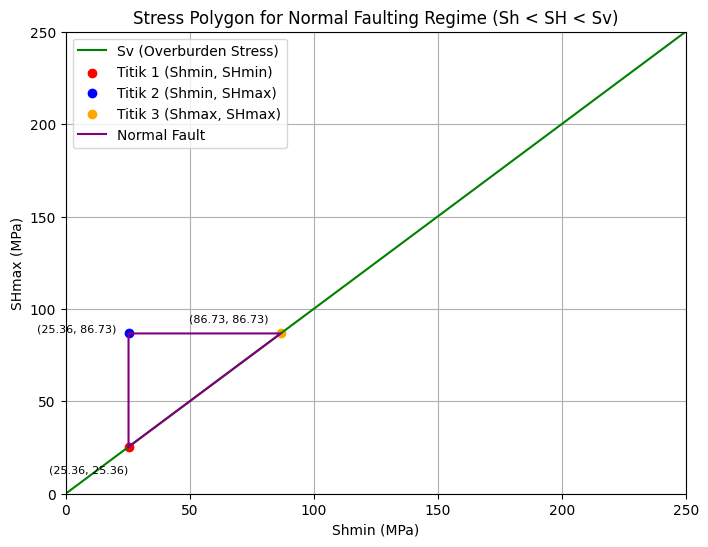

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = float(input('Masukkan massa jenis batuan dalam g/cc: '))  # g/cc
rho_fluida = float(input('Masukkan massa jenis fluida dalam g/cc: '))  # g/cc
u = float(input('Masukkan Koefisien Friksi: '))  # Koefisien friksi
depth = float(input('Masukkan kedalaman reservoir dalam meter: '))  # meter
g = 9.8  # m/s^2



# Perhitungan Pore Pressure dan Overbuden Stress
Pp = (rho_fluida * 1000 * depth * g) / (10**6)  # MPa
Sv = (rho_batuan * 1000 * depth * g) / (10**6)  # MPa

# Perhitungan perbandingan sigma1 dan sigma3
a = ((np.sqrt(u**2) + 1) + u) ** 2

# Batas Minimal dari Shmin (Menggunakan formulasi dari Zoback)
Sh = ((Sv - Pp) / a) + Pp

# Titik koordinat
Titik1_x, Titik1_y = Sh, Sh     # Titik 1: (Sh_bawah, SH_bawah)
Titik2_x, Titik2_y = Sh, Sv     # Titik 2: (Sh_bawah, SH_atas)
Titik3_x, Titik3_y = Sv, Sv     # Titik 3: (Sh_atas, SH_atas)

# Visualisasi
plt.figure(figsize=(8, 6))

# Garis utama y = x (Garis Sv / Overburden Stress)
Sv_x = np.arange(0, 500, 10)  # Rentang nilai
plt.plot(Sv_x, Sv_x, color='green', label='Sv (Overburden Stress)')

# Plot titik koordinat dengan label
plt.scatter(Titik1_x, Titik1_y, color='red', label='Titik 1 (Shmin, SHmin)')
plt.scatter(Titik2_x, Titik2_y, color='blue', label='Titik 2 (Shmin, SHmax)')
plt.scatter(Titik3_x, Titik3_y, color='orange', label='Titik 3 (Shmax, SHmax)')


# Menampilkan nilai angka pada masing-masing titik (ukuran diperkecil)
plt.text(Titik1_x, Titik1_y - 10, f'({Titik1_x:.2f}, {Titik1_y:.2f})', fontsize=8, verticalalignment='top', horizontalalignment='right')
plt.text(Titik2_x - 5, Titik2_y, f'({Titik2_x:.2f}, {Titik2_y:.2f})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.text(Titik3_x - 5, Titik3_y + 5, f'({Titik3_x:.2f}, {Titik3_y:.2f})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Pembuatan poligon
Poli1 = np.array([Titik1_x, Titik2_x, Titik3_x, Titik1_x])
Poli2 = np.array([Titik1_y, Titik2_y, Titik3_y, Titik1_y])
plt.plot(Poli1, Poli2, color='purple', label='Normal Fault')

# Konfigurasi plot
plt.title('Stress Polygon for Normal Faulting Regime (Sh < SH < Sv)')
plt.xlabel('Shmin (MPa)')
plt.ylabel('SHmax (MPa)')
plt.grid(True)
plt.xlim(0, 250)
plt.ylim(0, 250)

# Menampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()


Strike Slip

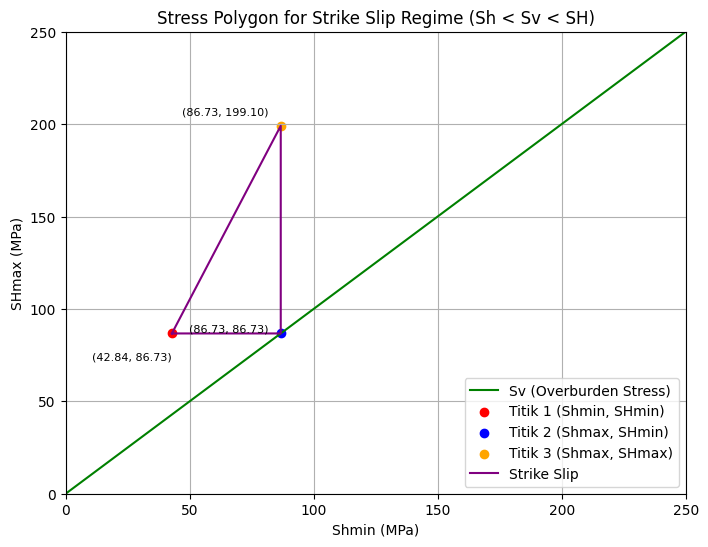

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parameter
rho_batuan = float(input('Masukkan massa jenis batuan dalam g/cc: '))  # g/cc
rho_fluida = float(input('Masukkan massa jenis fluida dalam g/cc: '))  # g/cc
u = float(input('Masukkan Koefisien Friksi: '))  # Koefisien friksi
depth = float(input('Masukkan kedalaman reservoir dalam meter: '))  # meter
g = 9.8  # m/s^2

# Perhitungan Pore Pressure dan Overbuden Stress
Pp = (rho_fluida * 1000 * depth * g) / (10**6)  # MPa
Sv = (rho_batuan * 1000 * depth * g) / (10**6)  # MPa

# Perhitungan perbandingan sigma1 dan sigma3
a = ((np.sqrt(u**2) + 1) + u) ** 2

#Pendefinisian titik koordinat
Sh_bawah = ((Sv-Pp)/a)+Pp
SH_bawah = Sv
Sh_atas = Sv
SH_atas = (a*(Sv-Pp))+Pp

# Titik koordinat
Titik1_x, Titik1_y = Sh_bawah, SH_bawah
Titik2_x, Titik2_y = Sh_atas, SH_bawah
Titik3_x, Titik3_y = Sh_atas, SH_atas

# Visualisasi
plt.figure(figsize=(8, 6))

# Garis utama y = x (Garis Sv / Overburden Stress)
Sv_x = np.arange(0, 500, 10)  # Rentang nilai
plt.plot(Sv_x, Sv_x, color='green', label='Sv (Overburden Stress)')

# Plot titik koordinat dengan label
plt.scatter(Titik1_x, Titik1_y, color='red', label='Titik 1 (Shmin, SHmin)')
plt.scatter(Titik2_x, Titik2_y, color='blue', label='Titik 2 (Shmax, SHmin)')
plt.scatter(Titik3_x, Titik3_y, color='orange', label='Titik 3 (Shmax, SHmax)')


# Menampilkan nilai angka pada masing-masing titik (ukuran diperkecil)
plt.text(Titik1_x, Titik1_y - 10, f'({Titik1_x:.2f}, {Titik1_y:.2f})', fontsize=8, verticalalignment='top', horizontalalignment='right')
plt.text(Titik2_x - 5, Titik2_y, f'({Titik2_x:.2f}, {Titik2_y:.2f})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.text(Titik3_x - 5, Titik3_y + 5, f'({Titik3_x:.2f}, {Titik3_y:.2f})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Pembuatan poligon
Poli1 = np.array([Titik1_x, Titik2_x, Titik3_x, Titik1_x])
Poli2 = np.array([Titik1_y, Titik2_y, Titik3_y, Titik1_y])
plt.plot(Poli1, Poli2, color='purple', label='Strike Slip')

# Konfigurasi plot
plt.title('Stress Polygon for Strike Slip Regime (Sh < Sv < SH)')
plt.xlabel('Shmin (MPa)')
plt.ylabel('SHmax (MPa)')
plt.grid(True)
plt.xlim(0, 250)
plt.ylim(0, 250)

# Menampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()


 Reverse Fault

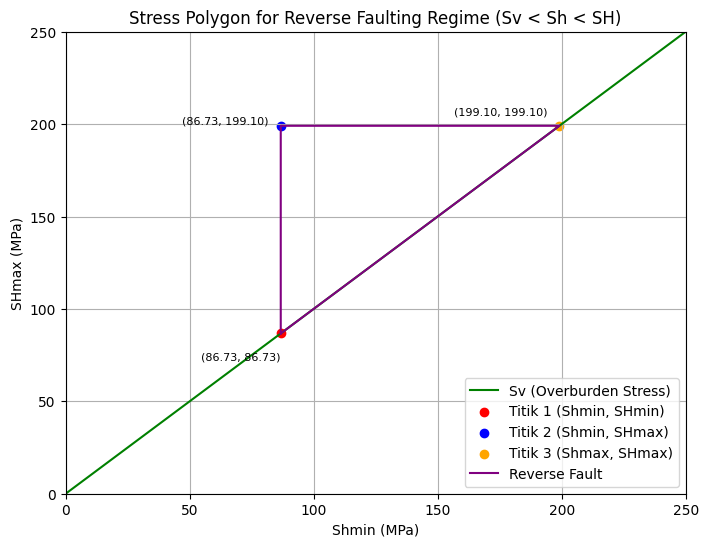

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = float(input('Masukkan massa jenis batuan dalam g/cc: '))  # g/cc
rho_fluida = float(input('Masukkan massa jenis fluida dalam g/cc: '))  # g/cc
u = float(input('Masukkan Koefisien Friksi: '))  # Koefisien friksi
depth = float(input('Masukkan kedalaman reservoir dalam meter: '))  # meter
g = 9.8  # m/s^2

# Perhitungan Pore Pressure dan Overbuden Stress
Pp = (rho_fluida * 1000 * depth * g) / (10**6)  # MPa
Sv = (rho_batuan * 1000 * depth * g) / (10**6)  # MPa

# Perhitungan perbandingan sigma1 dan sigma3
a = ((np.sqrt(u**2) + 1) + u) ** 2

# Batas maksimal dari SHmax (Menggunakan formulasi dari Zoback)
SH = (a*(Sv-Pp))+Pp

#Pendefinisian titik koordinat
Sh_bawah = Sv
SH_bawah = Sv
Sh_atas = SH
SH_atas = SH

# Titik koordinat
Titik1_x, Titik1_y = Sv, Sv     # Titik 1: (Sh_bawah, SH_bawah)
Titik2_x, Titik2_y = Sv, SH     # Titik 2: (Sh_bawah, SH_atas)
Titik3_x, Titik3_y = SH, SH     # Titik 3: (Sh_atas, SH_atas)

# Visualisasi
plt.figure(figsize=(8, 6))

# Garis utama y = x (Garis Sv / Overburden Stress)
Sv_x = np.arange(0, 500, 10)  # Rentang nilai
plt.plot(Sv_x, Sv_x, color='green', label='Sv (Overburden Stress)')

# Plot titik koordinat dengan label
plt.scatter(Titik1_x, Titik1_y, color='red', label='Titik 1 (Shmin, SHmin)')
plt.scatter(Titik2_x, Titik2_y, color='blue', label='Titik 2 (Shmin, SHmax)')
plt.scatter(Titik3_x, Titik3_y, color='orange', label='Titik 3 (Shmax, SHmax)')


# Menampilkan nilai angka pada masing-masing titik (ukuran diperkecil)
plt.text(Titik1_x, Titik1_y - 10, f'({Titik1_x:.2f}, {Titik1_y:.2f})', fontsize=8, verticalalignment='top', horizontalalignment='right')
plt.text(Titik2_x - 5, Titik2_y, f'({Titik2_x:.2f}, {Titik2_y:.2f})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.text(Titik3_x - 5, Titik3_y + 5, f'({Titik3_x:.2f}, {Titik3_y:.2f})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Pembuatan poligon tanpa arsir
Poli1 = np.array([Titik1_x, Titik2_x, Titik3_x, Titik1_x])
Poli2 = np.array([Titik1_y, Titik2_y, Titik3_y, Titik1_y])
plt.plot(Poli1, Poli2, color='purple', label='Reverse Fault')

# Konfigurasi plot
plt.title('Stress Polygon for Reverse Faulting Regime (Sv < Sh < SH)')
plt.xlabel('Shmin (MPa)')
plt.ylabel('SHmax (MPa)')
plt.grid(True)
plt.xlim(0, 250)
plt.ylim(0, 250)

# Menampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()

Stress Polygon Lengkap

Masukkan massa jenis batuan dalam g/cc: 5.9
Masukkan massa jenis fluida dalam g/cc: 1
Masukkan Koefisien Friksi: 0.3
Masukkan kedalaman reservoir dalam meter: 1500


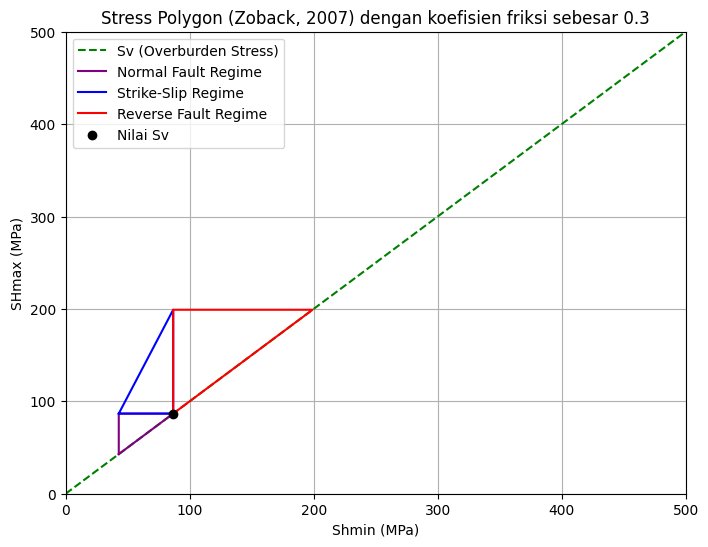

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = float(input('Masukkan massa jenis batuan dalam g/cc: '))  # g/cc
rho_fluida = float(input('Masukkan massa jenis fluida dalam g/cc: '))  # g/cc
u = float(input('Masukkan Koefisien Friksi: '))  # Koefisien friksi
depth = float(input('Masukkan kedalaman reservoir dalam meter: '))  # meter
g = 9.8  # m/s^2

# Perhitungan Pore Pressure dan Overburden Stress
Pp = (rho_fluida * 1000 * depth * g) / (10**6)  # MPa
Sv = (rho_batuan * 1000 * depth * g) / (10**6)  # MPa

# Perhitungan perbandingan sigma1 dan sigma3
a = ((np.sqrt(u**2) + 1) + u) ** 2

# Batas Minimal dan Maksimal dari Sh dan SH (Formulasi Zoback)
Sh_min = ((Sv - Pp) / a) + Pp
SH_max = (a * (Sv - Pp)) + Pp

# Titik koordinat untuk masing-masing stress regime
normal_fault = np.array([[Sh_min, Sh_min], [Sh_min, Sv], [Sv, Sv], [Sh_min, Sh_min]])
strike_slip = np.array([[Sh_min, Sv], [Sv, Sv], [Sv, SH_max], [Sh_min, Sv]])
reverse_fault = np.array([[Sv, Sv], [Sv, SH_max], [SH_max, SH_max], [Sv, Sv]])

# Visualisasi
plt.figure(figsize=(8, 6))

# Garis utama y = x (Overburden Stress Line)
Sv_x = np.arange(0, 1000, 10)  # Rentang nilai
plt.plot(Sv_x, Sv_x, color='green', label='Sv (Overburden Stress)', linestyle='--')

# Plot Stress Polygon
plt.plot(normal_fault[:, 0], normal_fault[:, 1], color='purple', label='Normal Fault Regime')
plt.plot(strike_slip[:, 0], strike_slip[:, 1], color='blue', label='Strike-Slip Regime')
plt.plot(reverse_fault[:, 0], reverse_fault[:, 1], color='red', label='Reverse Fault Regime')

# Plot titik Sv
plt.scatter(Sv, Sv, color='black', label='Nilai Sv', zorder=3)

# Konfigurasi plot
plt.title('Stress Polygon (Zoback, 2007)'+ ' dengan koefisien friksi sebesar '+str(u))
plt.xlabel('Shmin (MPa)')
plt.ylabel('SHmax (MPa)')
plt.grid(True)
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.legend()

# Tampilkan plot
plt.show()


Masukin koefisien friksi otomatis

Masukkan massa jenis batuan dalam g/cc: 5.9
Masukkan massa jenis fluida dalam g/cc: 1
Masukkan Koefisien Friksi: 0.8
Masukkan kedalaman reservoir dalam meter: 1500


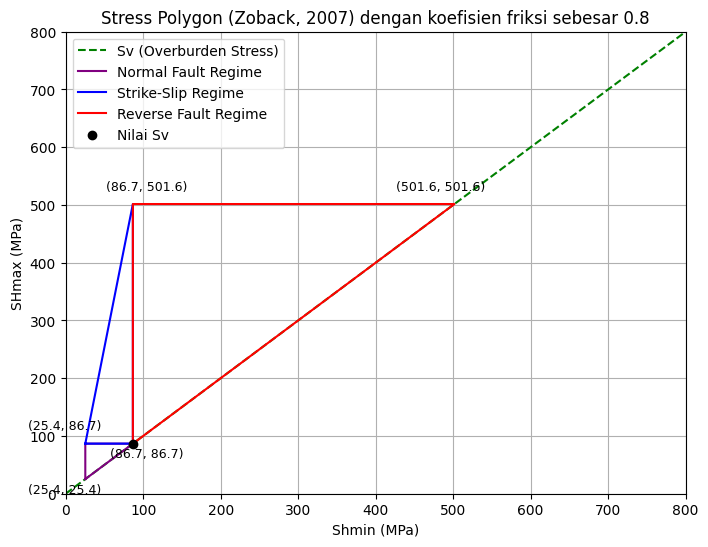

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = float(input('Masukkan massa jenis batuan dalam g/cc: '))  # g/cc
rho_fluida = float(input('Masukkan massa jenis fluida dalam g/cc: '))  # g/cc
u = float(input('Masukkan Koefisien Friksi: '))  # Koefisien friksi
depth = float(input('Masukkan kedalaman reservoir dalam meter: '))  # meter
g = 9.8  # m/s^2

# Perhitungan Pore Pressure dan Overburden Stress
Pp = (rho_fluida * 1000 * depth * g) / (10**6)  # MPa
Sv = (rho_batuan * 1000 * depth * g) / (10**6)  # MPa

# Perhitungan perbandingan sigma1 dan sigma3
a = ((np.sqrt(u**2) + 1) + u) ** 2

# Batas Minimal dan Maksimal dari Sh dan SH (Formulasi Zoback)
Sh_min = ((Sv - Pp) / a) + Pp
SH_max = (a * (Sv - Pp)) + Pp

# Titik koordinat untuk masing-masing stress regime
normal_fault = np.array([[Sh_min, Sh_min], [Sh_min, Sv], [Sv, Sv], [Sh_min, Sh_min]])
strike_slip = np.array([[Sh_min, Sv], [Sv, Sv], [Sv, SH_max], [Sh_min, Sv]])
reverse_fault = np.array([[Sv, Sv], [Sv, SH_max], [SH_max, SH_max], [Sv, Sv]])

# Visualisasi
plt.figure(figsize=(8, 6))

# Garis utama y = x (Overburden Stress Line)
Sv_x = np.arange(0, 1000, 10)  # Rentang nilai
plt.plot(Sv_x, Sv_x, color='green', label='Sv (Overburden Stress)', linestyle='--')

# Plot Stress Polygon
plt.plot(normal_fault[:, 0], normal_fault[:, 1], color='purple', label='Normal Fault Regime')
plt.plot(strike_slip[:, 0], strike_slip[:, 1], color='blue', label='Strike-Slip Regime')
plt.plot(reverse_fault[:, 0], reverse_fault[:, 1], color='red', label='Reverse Fault Regime')

# Plot titik Sv
plt.scatter(Sv, Sv, color='black', label='Nilai Sv', zorder=3)

# Memunculkan value pada titik-titik perpotongan
titik_perpotongan = {
    "Shmin, Shmin": (Sh_min, Sh_min, (-15, -10)),  # Offset ke kiri bawah
    "Shmin, Sv": (Sh_min, Sv, (-15, 10)),  # Offset ke kiri atas
    "Sv, Sv": (Sv, Sv, (10, -10)),  # Offset ke kanan bawah
    "Sv, SHmax": (Sv, SH_max, (10, 10)),  # Offset ke kanan atas
    "SHmax, SHmax": (SH_max, SH_max, (-10, 10))  # Offset ke kiri atas
}

for label, (x, y, offset) in titik_perpotongan.items():
    plt.annotate(f'({x:.1f}, {y:.1f})', (x, y), textcoords="offset points",
                 xytext=offset, ha='center', fontsize=9, color='black')

# Konfigurasi plot
plt.title('Stress Polygon (Zoback, 2007)'+ ' dengan koefisien friksi sebesar '+str(u))
plt.xlabel('Shmin (MPa)')
plt.ylabel('SHmax (MPa)')
plt.grid(True)
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.legend()

# Tampilkan plot
plt.show()



Perhitungan Shmin dan SHmax untuk koefisien friksi tertentu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = float(input('Masukkan massa jenis batuan dalam g/cc: '))  # g/cc
rho_fluida = float(input('Masukkan massa jenis fluida dalam g/cc: '))  # g/cc
depth = float(input('Masukkan kedalaman reservoir dalam meter: '))  # meter
g = 9.8  # m/s^2

# Perhitungan Pore Pressure dan Overburden Stress
Pp = (rho_fluida * 1000 * depth * g) / (10**6)  # MPa
Sv = (rho_batuan * 1000 * depth * g) / (10**6)  # MPa

# Input koefisien friksi
u_values = list(map(float, input("Masukkan nilai Koefisien Friksi (pisahkan dengan spasi): ").split()))

# Perhitungan dan output untuk setiap nilai u
print("\nHasil Perhitungan:")
print(f"{'u':<10}{'Sh_min (MPa)':<15}{'SH_max (MPa)':<15}")
print("-" * 40)

for u in u_values:
    a = ((np.sqrt(u**2) + 1) + u) ** 2
    Sh_min = ((Sv - Pp) / a) + Pp
    SH_max = (a * (Sv - Pp)) + Pp
    print(f"{u:<10.2f}{Sh_min:<15.2f}{SH_max:<15.2f}")




Masukkan massa jenis batuan dalam g/cc: 5.9
Masukkan massa jenis fluida dalam g/cc: 1
Masukkan kedalaman reservoir dalam meter: 1500
Masukkan nilai Koefisien Friksi (pisahkan dengan spasi): 0.3 0.4 0.6 0.8

Hasil Perhitungan:
u         Sh_min (MPa)   SH_max (MPa)   
----------------------------------------
0.30      42.84          199.10         
0.40      36.93          248.08         
0.60      29.58          363.33         
0.80      25.36          501.62         


Perbandingan Stress Polygon terhadap pengaruh Pore Pressure


Masukkan massa jenis batuan dalam g/cc: 5.9
Masukkan massa jenis fluida dalam g/cc: 1
Masukkan Koefisien Friksi: 0.8
Masukkan kedalaman reservoir dalam meter: 1500


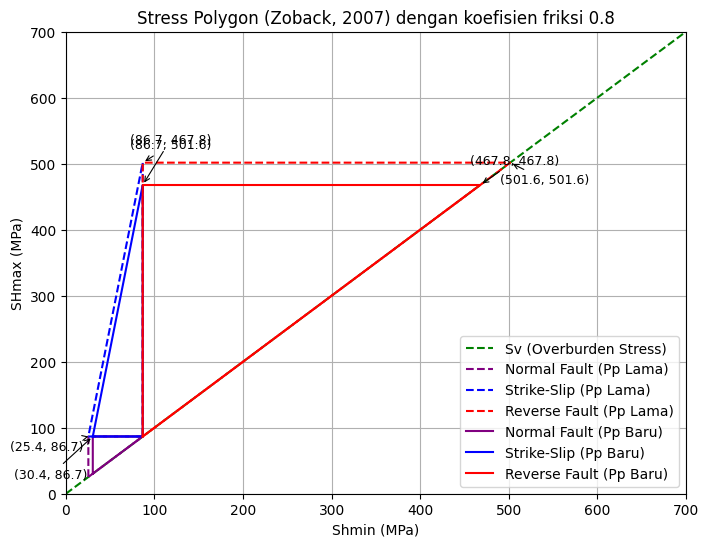

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input parameter
rho_batuan = float(input('Masukkan massa jenis batuan dalam g/cc: '))  # g/cc
rho_fluida = float(input('Masukkan massa jenis fluida dalam g/cc: '))  # g/cc
u = float(input('Masukkan Koefisien Friksi: '))  # Koefisien friksi
depth = float(input('Masukkan kedalaman reservoir dalam meter: '))  # meter
g = 9.8  # m/s^2

# Perhitungan Pore Pressure dan Overburden Stress
Pp_lama = (rho_fluida * 1000 * depth * g) / (10**6)  # MPa
Pp_baru = Pp_lama * 1.4  # Peningkatan 40%
Sv = (rho_batuan * 1000 * depth * g) / (10**6)  # MPa

# Perhitungan perbandingan sigma1 dan sigma3
a = ((np.sqrt(u**2) + 1) + u) ** 2

# Perhitungan Sh_min dan SH_max untuk Pp lama
Sh_min_lama = ((Sv - Pp_lama) / a) + Pp_lama
SH_max_lama = (a * (Sv - Pp_lama)) + Pp_lama

# Perhitungan Sh_min dan SH_max untuk Pp baru
Sh_min_baru = ((Sv - Pp_baru) / a) + Pp_baru
SH_max_baru = (a * (Sv - Pp_baru)) + Pp_baru

# Perhitungan titik perpotongan
intersec_nf_ss_lama = (Sh_min_lama, Sv)  # Normal Fault & Strike-Slip (Pp Lama)
intersec_nf_ss_baru = (Sh_min_baru, Sv)  # Normal Fault & Strike-Slip (Pp Baru)
intersec_sv_rf_lama = (Sv, SH_max_lama)  # Overburden & Reverse Fault (Pp Lama)
intersec_sv_rf_baru = (Sv, SH_max_baru)  # Overburden & Reverse Fault (Pp Baru)
intersec_rf_ov_lama = (SH_max_lama, SH_max_lama)  # Karena Overburden Line = y = x
intersec_rf_ov_baru = (SH_max_baru, SH_max_baru)


# Titik koordinat untuk masing-masing stress regime (Pp lama)
normal_fault_lama = np.array([[Sh_min_lama, Sh_min_lama], [Sh_min_lama, Sv], [Sv, Sv], [Sh_min_lama, Sh_min_lama]])
strike_slip_lama = np.array([[Sh_min_lama, Sv], [Sv, Sv], [Sv, SH_max_lama], [Sh_min_lama, Sv]])
reverse_fault_lama = np.array([[Sv, Sv], [Sv, SH_max_lama], [SH_max_lama, SH_max_lama], [Sv, Sv]])

# Titik koordinat untuk masing-masing stress regime (Pp baru)
normal_fault_baru = np.array([[Sh_min_baru, Sh_min_baru], [Sh_min_baru, Sv], [Sv, Sv], [Sh_min_baru, Sh_min_baru]])
strike_slip_baru = np.array([[Sh_min_baru, Sv], [Sv, Sv], [Sv, SH_max_baru], [Sh_min_baru, Sv]])
reverse_fault_baru = np.array([[Sv, Sv], [Sv, SH_max_baru], [SH_max_baru, SH_max_baru], [Sv, Sv]])

# Visualisasi
plt.figure(figsize=(8, 6))

# Garis utama y = x (Overburden Stress Line)
Sv_x = np.arange(0, 1000, 10)
plt.plot(Sv_x, Sv_x, color='green', label='Sv (Overburden Stress)', linestyle='--')

# Plot Stress Polygon untuk Pp lama (garis putus-putus)
plt.plot(normal_fault_lama[:, 0], normal_fault_lama[:, 1], color='purple', linestyle='--', label='Normal Fault (Pp Lama)')
plt.plot(strike_slip_lama[:, 0], strike_slip_lama[:, 1], color='blue', linestyle='--', label='Strike-Slip (Pp Lama)')
plt.plot(reverse_fault_lama[:, 0], reverse_fault_lama[:, 1], color='red', linestyle='--', label='Reverse Fault (Pp Lama)')

# Plot Stress Polygon untuk Pp baru (garis tegas)
plt.plot(normal_fault_baru[:, 0], normal_fault_baru[:, 1], color='purple', linestyle='-', label='Normal Fault (Pp Baru)')
plt.plot(strike_slip_baru[:, 0], strike_slip_baru[:, 1], color='blue', linestyle='-', label='Strike-Slip (Pp Baru)')
plt.plot(reverse_fault_baru[:, 0], reverse_fault_baru[:, 1], color='red', linestyle='-', label='Reverse Fault (Pp Baru)')

# Plot titik perpotongan dengan koordinat
titik_perpotongan = {
    "NF-SS Lama": (intersec_nf_ss_lama[0], intersec_nf_ss_lama[1], (-30, -10)),
    "NF-SS Baru": (intersec_nf_ss_baru[0], intersec_nf_ss_baru[1], (-30, -30)),
    "Sv-RF Lama": (intersec_sv_rf_lama[0], intersec_sv_rf_lama[1], (20, 10)),
    "Sv-RF Baru": (intersec_sv_rf_baru[0], intersec_sv_rf_baru[1], (20, 30)),
    "RF-Ov Lama": (intersec_rf_ov_lama[0], intersec_rf_ov_lama[1], (25, -15)),
    "RF-Ov Baru": (intersec_rf_ov_baru[0], intersec_rf_ov_baru[1], (25, 15))
}

for label, (x, y, offset) in titik_perpotongan.items():
    plt.annotate(f'({x:.1f}, {y:.1f})',
                 (x, y),
                 textcoords="offset points",
                 xytext=offset,
                 ha='center',
                 fontsize=9,
                 color='black',
                 arrowprops=dict(arrowstyle="->", color='black', lw=0.8))

# Konfigurasi plot
plt.title(f'Stress Polygon (Zoback, 2007) dengan koefisien friksi {u}')
plt.xlabel('Shmin (MPa)')
plt.ylabel('SHmax (MPa)')
plt.grid(True)
plt.xlim(0, 700)
plt.ylim(0, 700)
plt.legend()

# Tampilkan plot
plt.show()
